# BE Final Project: House Price Pridection

## 1. Data Preprocessing

### 1.1 Importing Required Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics


### 1.2 Data Acquisition and DataFrame Creation

In [2]:
df = pd.read_csv('../CSV/India.csv', index_col=False)

### 1.3 Data Evaluation

In [3]:
df.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Banglore,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Banglore,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Banglore,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Banglore,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Banglore,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.size

413813

In [5]:
df.shape

(10093, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10093 entries, 0 to 10092
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   City                 10093 non-null  object
 3   Location             10093 non-null  object
 4   No. of Bedrooms      10093 non-null  int64 
 5   Resale               10093 non-null  int64 
 6   MaintenanceStaff     10093 non-null  int64 
 7   Gymnasium            10093 non-null  int64 
 8   SwimmingPool         10093 non-null  int64 
 9   LandscapedGardens    10093 non-null  int64 
 10  JoggingTrack         10093 non-null  int64 
 11  RainWaterHarvesting  10093 non-null  int64 
 12  IndoorGames          10093 non-null  int64 
 13  ShoppingMall         10093 non-null  int64 
 14  Intercom             10093 non-null  int64 
 15  SportsFacility       10093 non-null  int64 
 16  ATM 

In [7]:
df.columns

Index(['Price', 'Area', 'City', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

### 1.4 Data Insights

In [8]:
df.isnull().sum()

Price                  0
Area                   0
City                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [9]:
df.describe()['Wardrobe']

count    10093.000000
mean         0.020906
std          0.143075
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Wardrobe, dtype: float64

In [10]:
# Corelation without considerating LOCATION.

df.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.652585,0.439123,0.128312,0.088580,0.140537,0.156452,0.123177,0.101692,0.134042,...,0.073478,0.112406,0.060695,0.098230,0.065167,0.103201,0.089542,0.099936,0.125293,0.107972
Area,0.652585,1.000000,0.729552,-0.003146,-0.011789,0.276395,0.315745,0.234055,0.255538,0.200987,...,0.122343,0.039565,0.152859,0.129399,0.061354,0.091985,0.105422,0.113188,0.044020,0.107304
No. of Bedrooms,0.439123,0.729552,1.000000,0.003044,-0.096969,0.133460,0.181079,0.121685,0.132476,0.069604,...,0.105624,-0.016500,0.081532,0.093558,0.017765,0.070671,0.080242,0.074601,0.011868,0.079399
Resale,0.128312,-0.003146,0.003044,1.000000,0.263689,-0.154323,-0.226471,-0.137831,-0.173717,-0.016485,...,0.012941,0.185955,0.008700,-0.019580,-0.049791,0.014443,-0.014219,0.021793,0.165969,-0.010177
MaintenanceStaff,0.088580,-0.011789,-0.096969,0.263689,1.000000,0.137828,0.068617,0.191619,0.165869,0.323851,...,0.127789,0.229347,0.220419,-0.013074,0.144741,0.023459,-0.022006,-0.011499,0.116114,-0.016042
Gymnasium,0.140537,0.276395,0.133460,-0.154323,0.137828,1.000000,0.759187,0.579740,0.632427,0.481850,...,0.370044,0.125762,0.366469,0.108146,0.139806,0.069991,0.120670,0.138322,-0.026172,0.105718
SwimmingPool,0.156452,0.315745,0.181079,-0.226471,0.068617,0.759187,1.000000,0.631171,0.689844,0.528043,...,0.316413,0.008856,0.424854,0.143260,0.168128,0.090592,0.153211,0.158897,-0.007804,0.138983
LandscapedGardens,0.123177,0.234055,0.121685,-0.137831,0.191619,0.579740,0.631171,1.000000,0.680713,0.584829,...,0.277480,0.012441,0.444660,0.077888,0.181454,0.040081,0.087720,0.105500,0.028112,0.083611
JoggingTrack,0.101692,0.255538,0.132476,-0.173717,0.165869,0.632427,0.689844,0.680713,1.000000,0.613809,...,0.249307,-0.036021,0.537587,0.070686,0.194235,0.035794,0.066486,0.070444,-0.025454,0.070440
RainWaterHarvesting,0.134042,0.200987,0.069604,-0.016485,0.323851,0.481850,0.528043,0.584829,0.613809,1.000000,...,0.285845,-0.018498,0.556846,0.032923,0.149614,0.050880,0.036226,0.045810,0.062362,0.042029


Text(0.5, 1.0, 'Corelation Without LOCATION Factor')

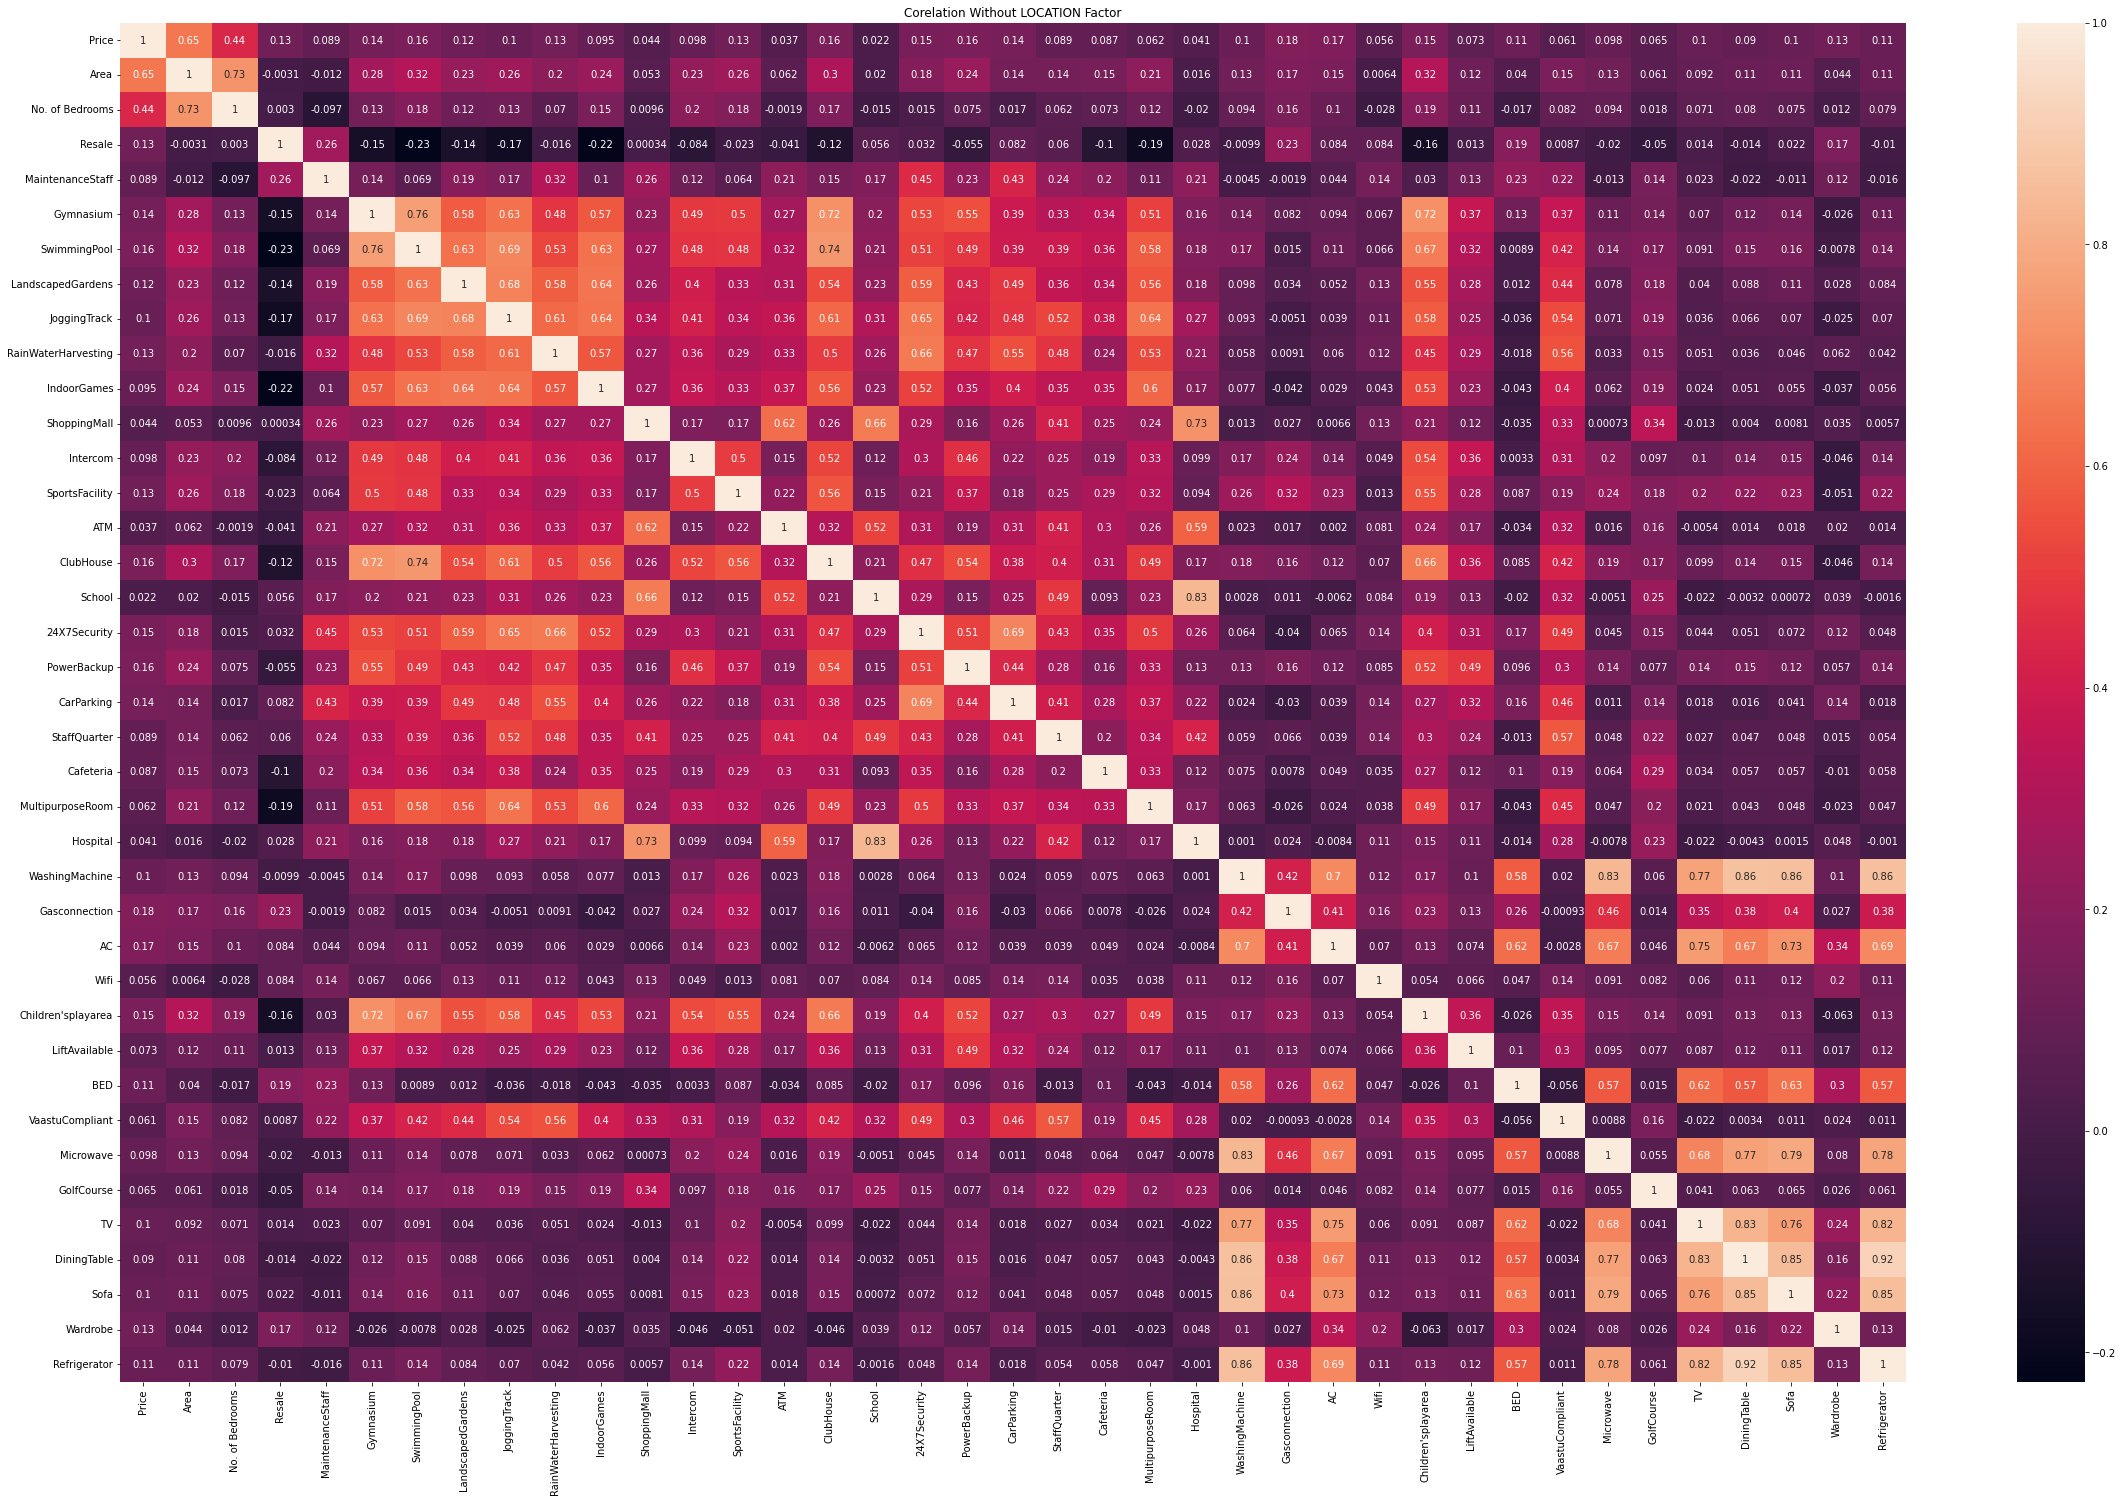

In [11]:
plt.figure(figsize= (40,25))
sns.heatmap(df.corr(), annot=True)
plt.title("Corelation Without LOCATION Factor")

## 2. Data Transfromation and Scaling

### 2.1 Encoding Data: Label Encoding

In [12]:
# Checking that, is it feasible to use Label Encoding for 'Location column'?
# ---> Yes, Because the no.of Total Rows are 7719 and No. of unique values for Location are 413.

df['Location'].unique()
df['Location'].unique().size

849

In [13]:
df['City'].unique()
df['City'].unique().size

6

In [14]:
# from sklearn.preprocessing ---> LabelEncoder

label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [15]:
df_encoded = df.copy()
df_encoded['Location'] = label_encoder.fit_transform(df['Location'])
df_encoded['City'] = label_encoder.fit_transform(df['City'])

In [16]:
df_encoded.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,0,254,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,0,155,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,0,302,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,0,163,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,0,319,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_encoded['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10093 entries, 0 to 10092
Series name: Location
Non-Null Count  Dtype
--------------  -----
10093 non-null  int32
dtypes: int32(1)
memory usage: 39.6 KB


In [18]:
df_encoded['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10093 entries, 0 to 10092
Series name: City
Non-Null Count  Dtype
--------------  -----
10093 non-null  int32
dtypes: int32(1)
memory usage: 39.6 KB


C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


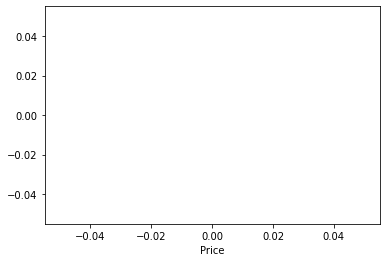

In [19]:
sns.scatterplot(df_encoded['Price'])
plt.show()


Text(0.5, 1.0, 'Corealtion With LOCATION Factor')

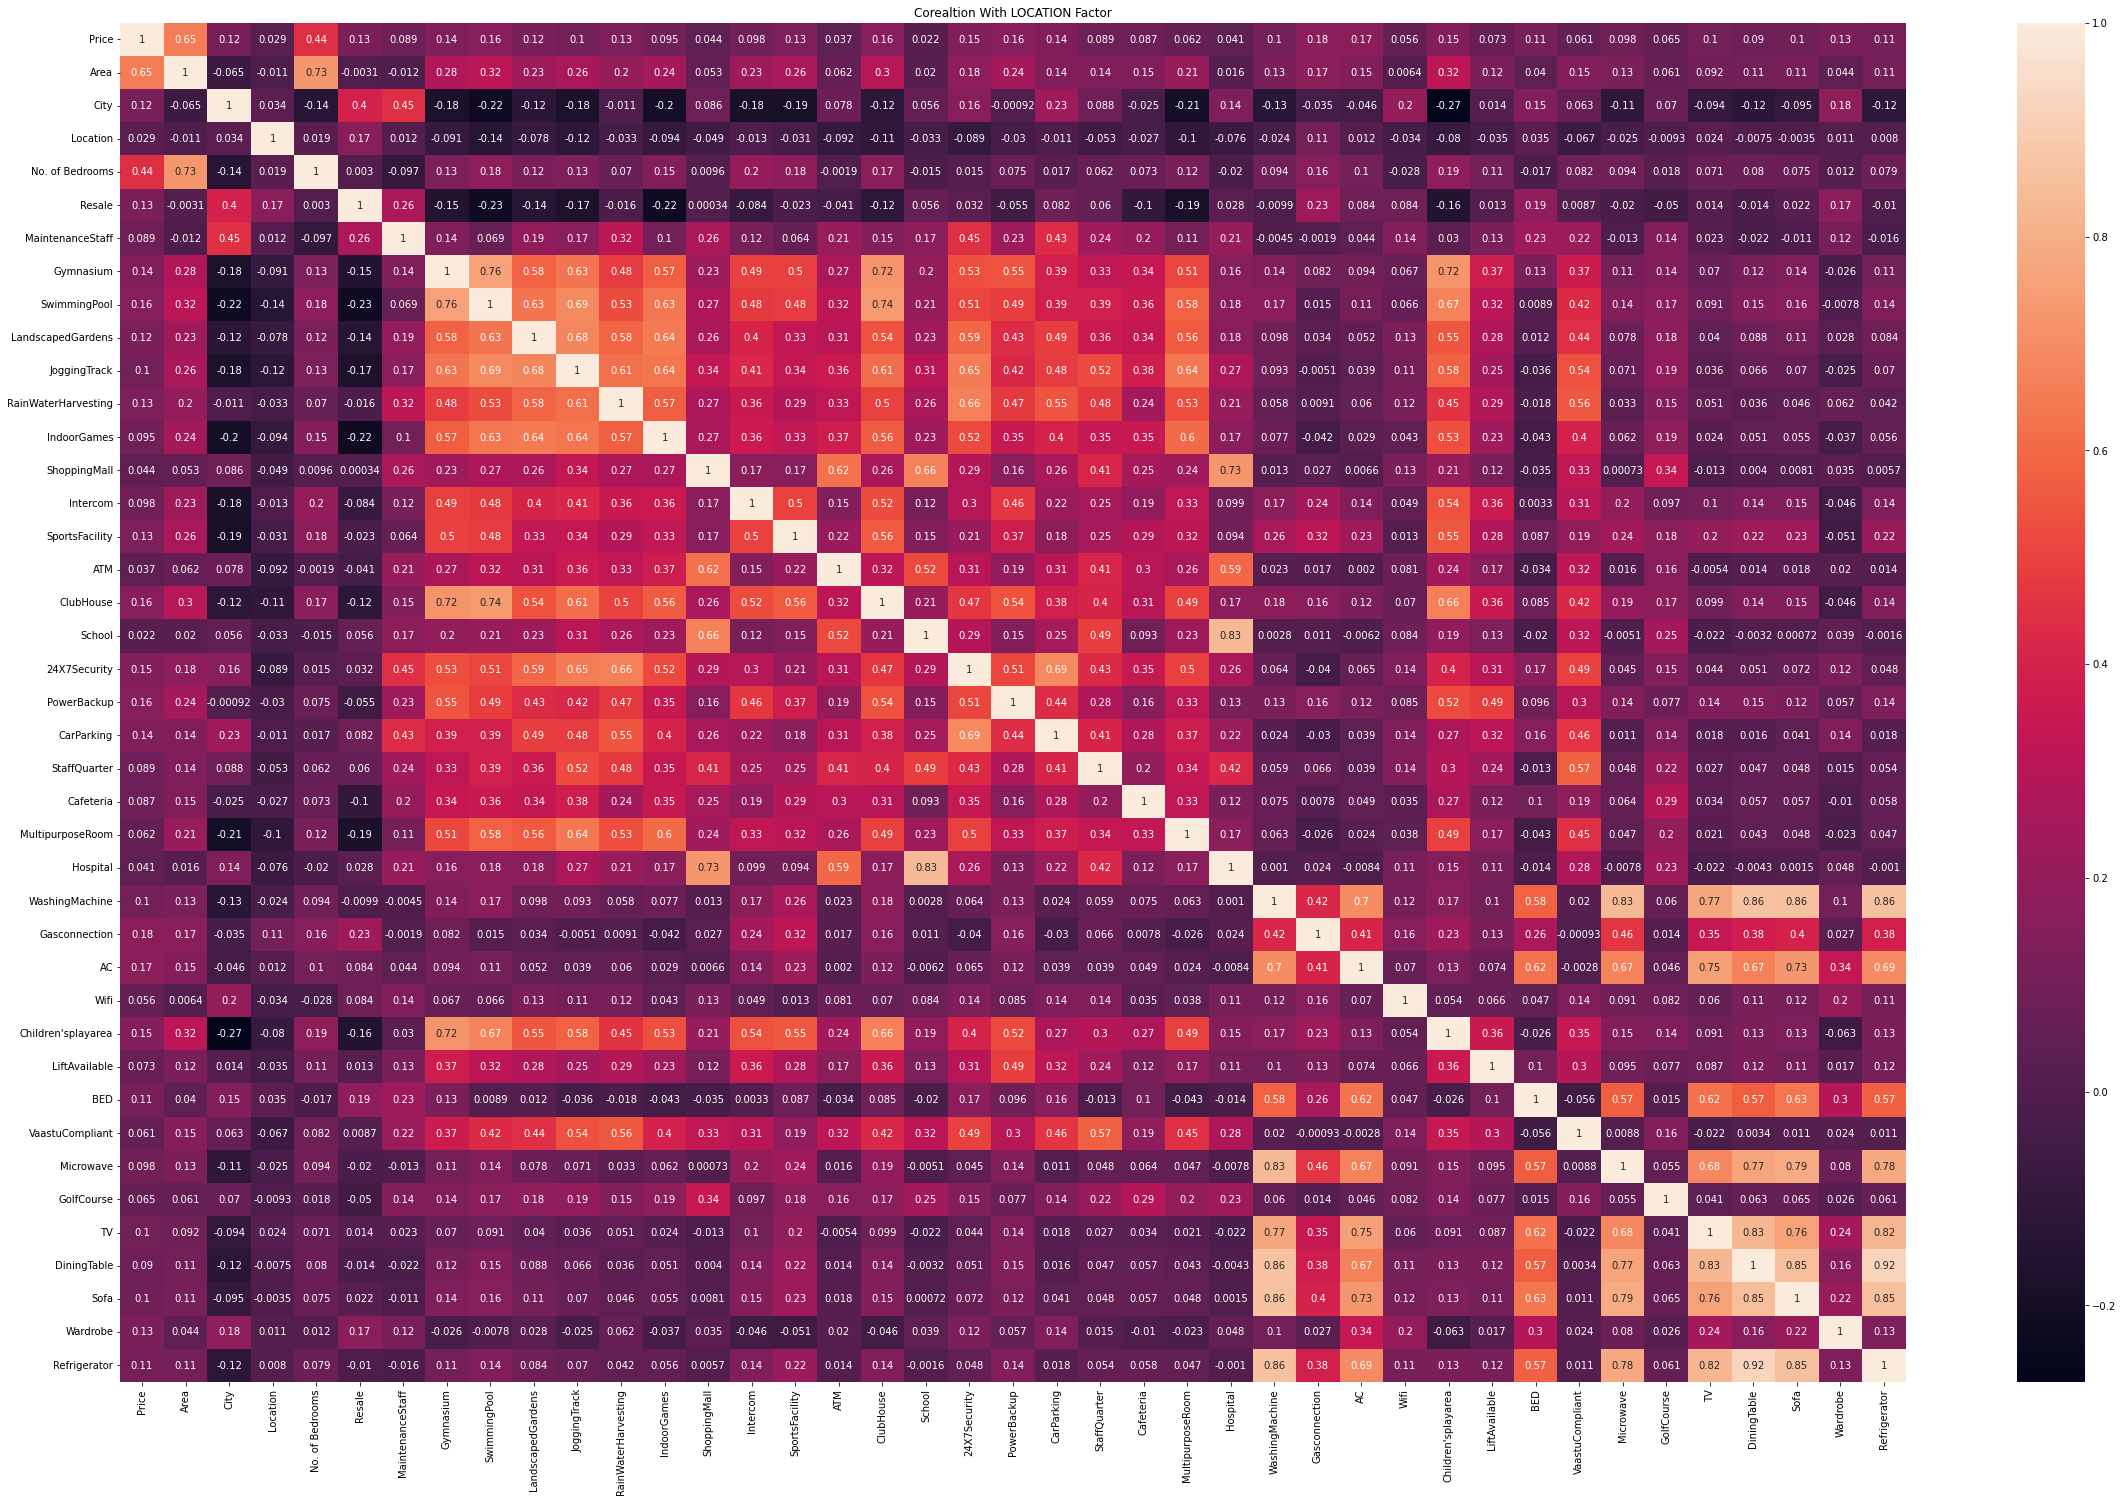

In [20]:
plt.figure(figsize= (40,25))
sns.heatmap(df_encoded.corr(), annot=True)
plt.title("Corealtion With LOCATION Factor")
# plt.show()
# plt.savefig('Results/Corelation-heatmap', dpi=500, bbox_inches='tight')

In [21]:
df_encoded.corr().iloc[0]

Price                  1.000000
Area                   0.652585
City                   0.117877
Location               0.028993
No. of Bedrooms        0.439123
Resale                 0.128312
MaintenanceStaff       0.088580
Gymnasium              0.140537
SwimmingPool           0.156452
LandscapedGardens      0.123177
JoggingTrack           0.101692
RainWaterHarvesting    0.134042
IndoorGames            0.095156
ShoppingMall           0.043710
Intercom               0.097880
SportsFacility         0.130813
ATM                    0.037061
ClubHouse              0.156836
School                 0.021775
24X7Security           0.148066
PowerBackup            0.156585
CarParking             0.143605
StaffQuarter           0.088917
Cafeteria              0.087466
MultipurposeRoom       0.062019
Hospital               0.040926
WashingMachine         0.104595
Gasconnection          0.176744
AC                     0.168448
Wifi                   0.056363
Children'splayarea     0.152377
LiftAvai

### 2.2 Encoding Data: One Hot Encoding

In [22]:
# from sklearn.preprocessing ---> OneHotEncoder

# df_ohe = df1.copy()
# ohe = OneHotEncoder()
# print(ohe)

In [23]:
# feature_array = ohe.fit_transform(df_ohe[['Location']]).toarray()

In [24]:
# feature_array = feature_array[:,1:]
# column_names = df_ohe['Location'].tolist()

In [25]:
# df_ohe.drop('Location', axis = 1)
# pd.DataFrame(feature_array, columns = column_names)

### 2.3 Data Scaling

 Scaling AREA and PRICE Data as it contains high deviation of values

In [26]:
df_scaled = df_encoded.copy()
scaler = MinMaxScaler()
df_scaled[['Area']] = scaler.fit_transform(df_scaled[['Area']])
df_scaled[['Price']] = scaler.fit_transform(df_scaled[['Price']])

In [27]:
df_scaled.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0.070352,0.323711,0,254,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0.014794,0.087113,0,155,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0.007201,0.100928,0,302,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0.015975,0.152062,0,163,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.012173,0.151546,0,319,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


### 2.4 Splitting Data: Dependent and Independent Variable

In [28]:
df_temp = df_scaled.copy()
data = df_temp.drop('Price', axis=1)
price = df_temp['Price']

In [29]:
data.head()

,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0.323711,0,254,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0.087113,0,155,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0.100928,0,302,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0.152062,0,163,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.151546,0,319,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
price.head()

0    0.070352
1    0.014794
2    0.007201
3    0.015975
4    0.012173
Name: Price, dtype: float64

### 2.5 Train - Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size=0.2)

In [32]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

8074 2019 8074 2019


## 3 Model Evaluation

### 3.1 Linear Regression

#### 3.1.1 Linear Regression: Training Model

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [34]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

#### 3.1.2 Linear Regression: Testing

In [35]:
y_predict_LR = LR.predict(X_test)
print(y_predict_LR)

[ 2.91398301e-02  1.52523053e-02  2.73362541e-02 ... -5.11310706e-06
  8.92560722e-03  5.28471209e-03]


#### 3.1.3 Linear Regression: Score / Results

In [36]:
LR_score = LR.score(X_test, y_test)
print(LR_score*100)

49.80157430723955


In [37]:
R2_Score_LR = r2_score(y_test, y_predict_LR)*100
MAE_LR = metrics.mean_absolute_error(y_test, y_predict_LR)*100
MSE_LR = metrics.mean_squared_error(y_test, y_predict_LR)*100
RSME_LR = np.sqrt(metrics.mean_squared_error(y_test, y_predict_LR))*100
print('R2 Score Linear Regression', R2_Score_LR)
print('MAE Linear Regression:', MAE_LR)
print('MSE Linear Regression:', MSE_LR)
print('RMSE Linear Regression:', RSME_LR)

R2 Score Linear Regression 49.80157430723955
MAE Linear Regression: 1.0127373298244255
MSE Linear Regression: 0.060663459664664195
RMSE Linear Regression: 2.462995324085375


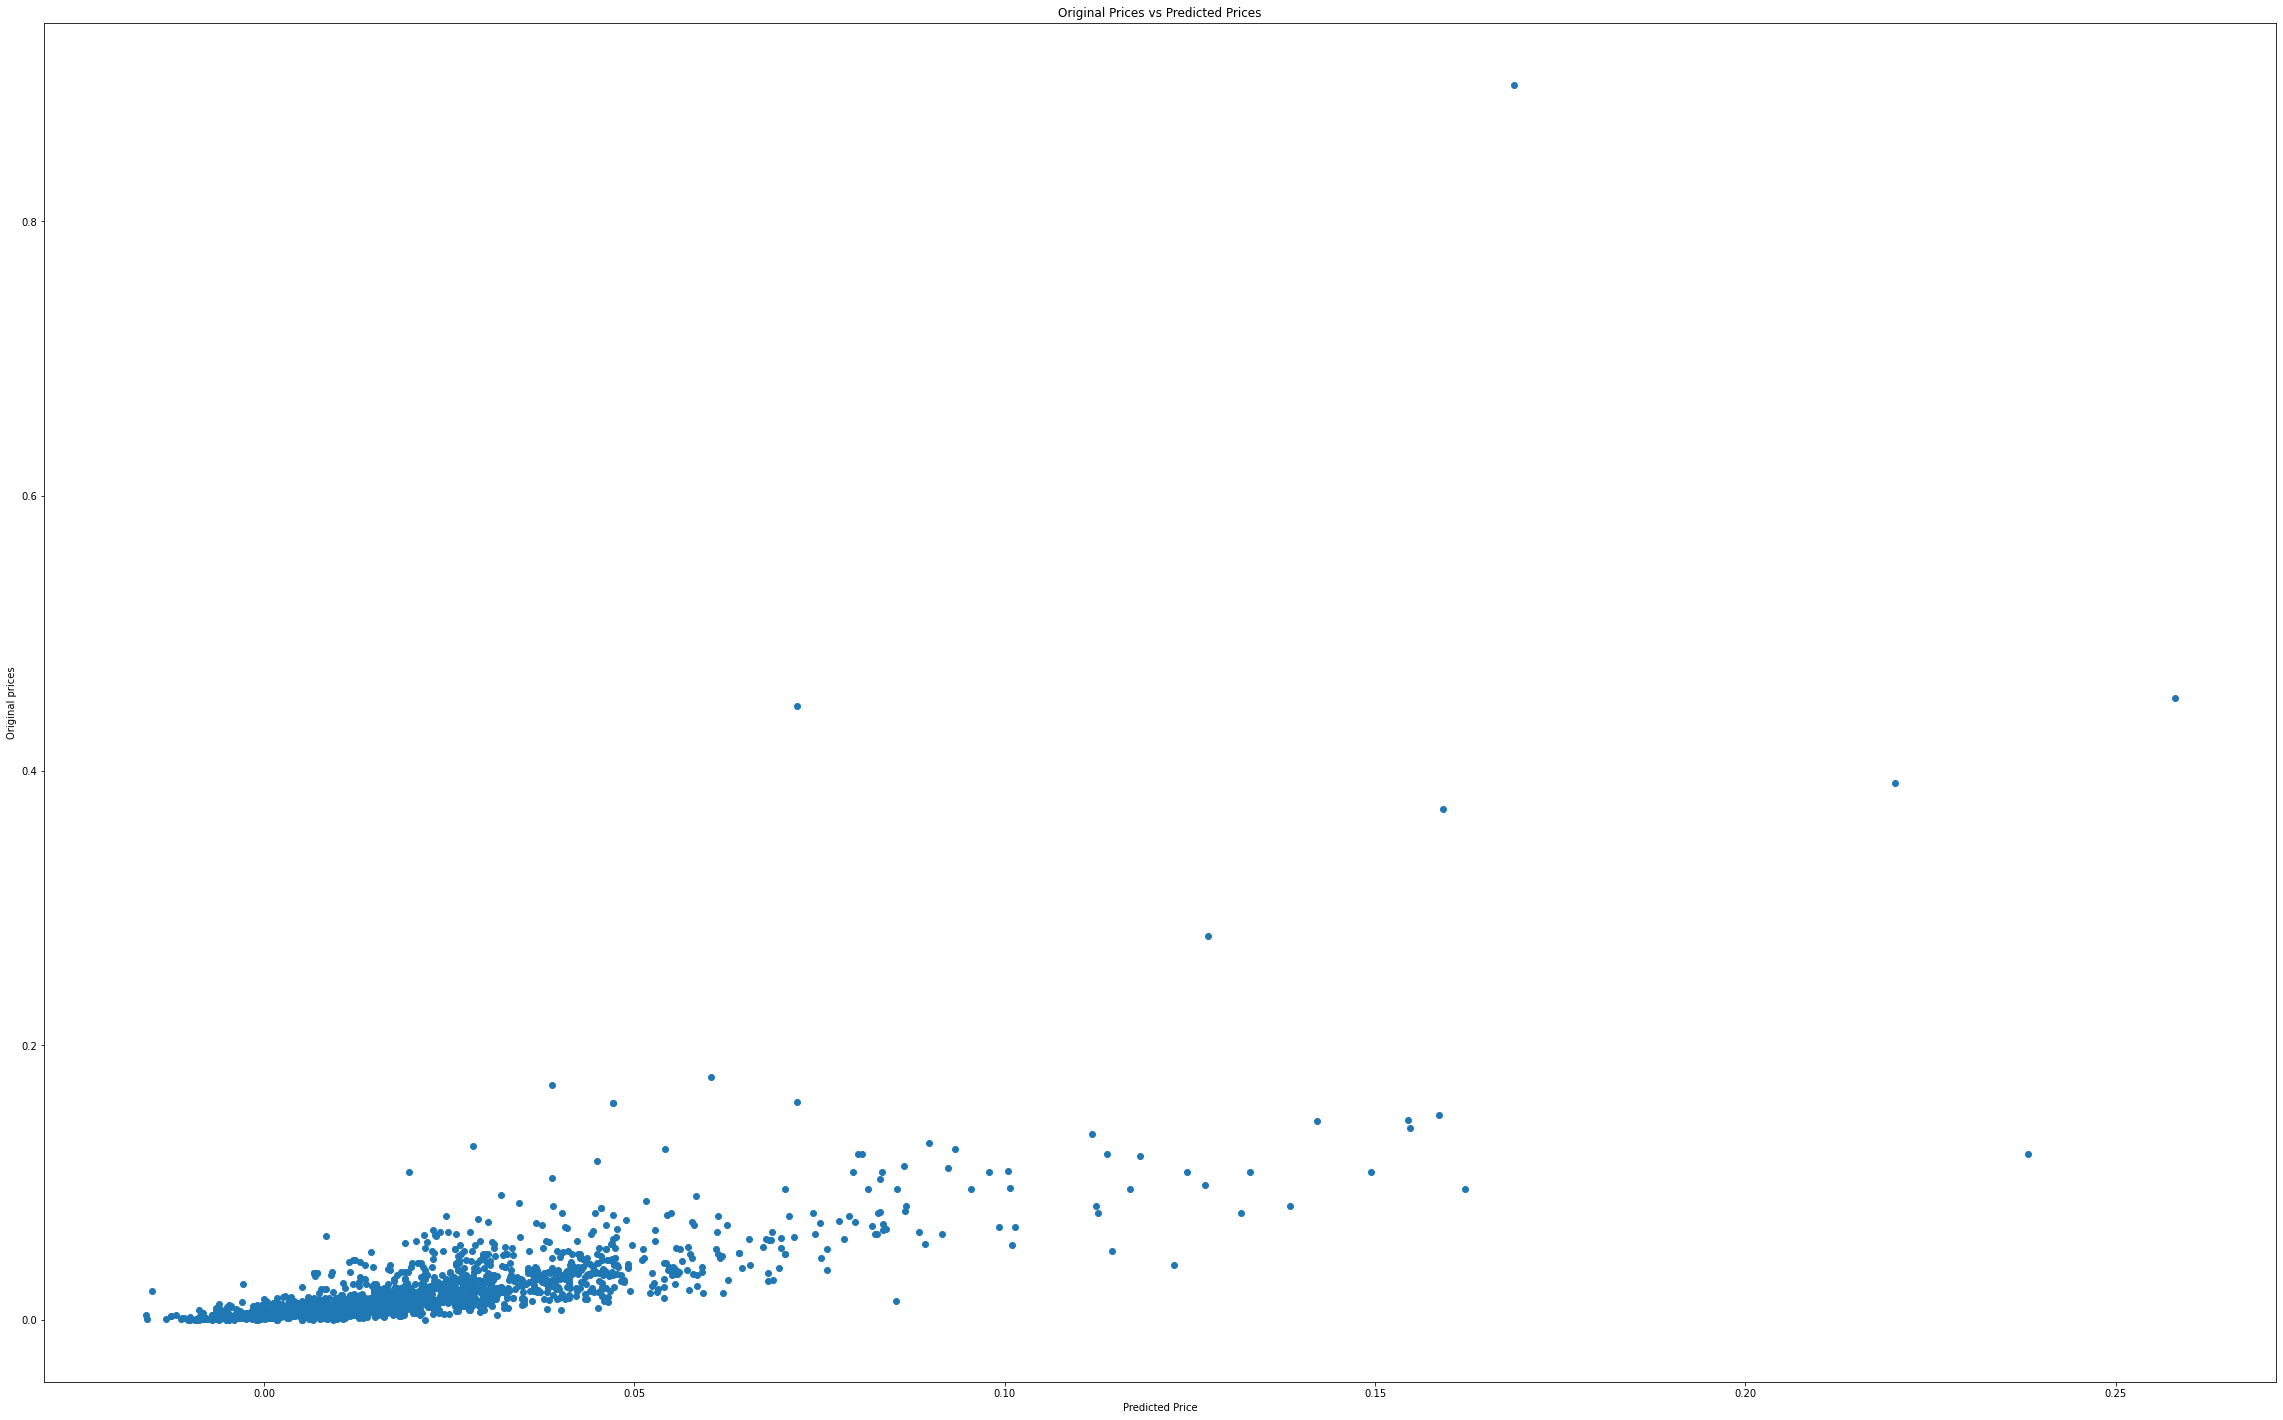

In [38]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_LR, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Original Prices vs Predicted Prices")
plt.show()

### 3.2 Ridge Regression

#### 3.2.1 Redge Regression: Model Training

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
RR = Ridge()
RR.fit(X_train,y_train)

Ridge()

#### 3.2.2 Ridge Regression: Testing

In [41]:
y_predict_RR = RR.predict(X_test)
print(y_predict_RR)

[0.03016459 0.01470442 0.02746159 ... 0.00063242 0.0089898  0.00506551]


#### 3.2.3 Ridge Regression: Score / Results

In [42]:
RR_score = RR.score(X_test, y_test)
print(RR_score*100)

49.53161430864426


In [43]:
R2_Score_RR = r2_score(y_test, y_predict_RR)*100
MAE_RR = metrics.mean_absolute_error(y_test, y_predict_RR)*100
MSE_RR = metrics.mean_squared_error(y_test, y_predict_RR)*100
RSME_RR = np.sqrt(metrics.mean_squared_error(y_test, y_predict_RR))*100
print('R2 Score Linear Regression', R2_Score_RR)
print('MAE Ridge Regression:', MAE_RR)
print('MSE Ridge Regression:', MSE_RR)
print('RMSE Ridge Regression:', RSME_RR)

R2 Score Linear Regression 49.53161430864426
MAE Ridge Regression: 1.001787793171294
MSE Ridge Regression: 0.060989699128548826
RMSE Ridge Regression: 2.469609263194257


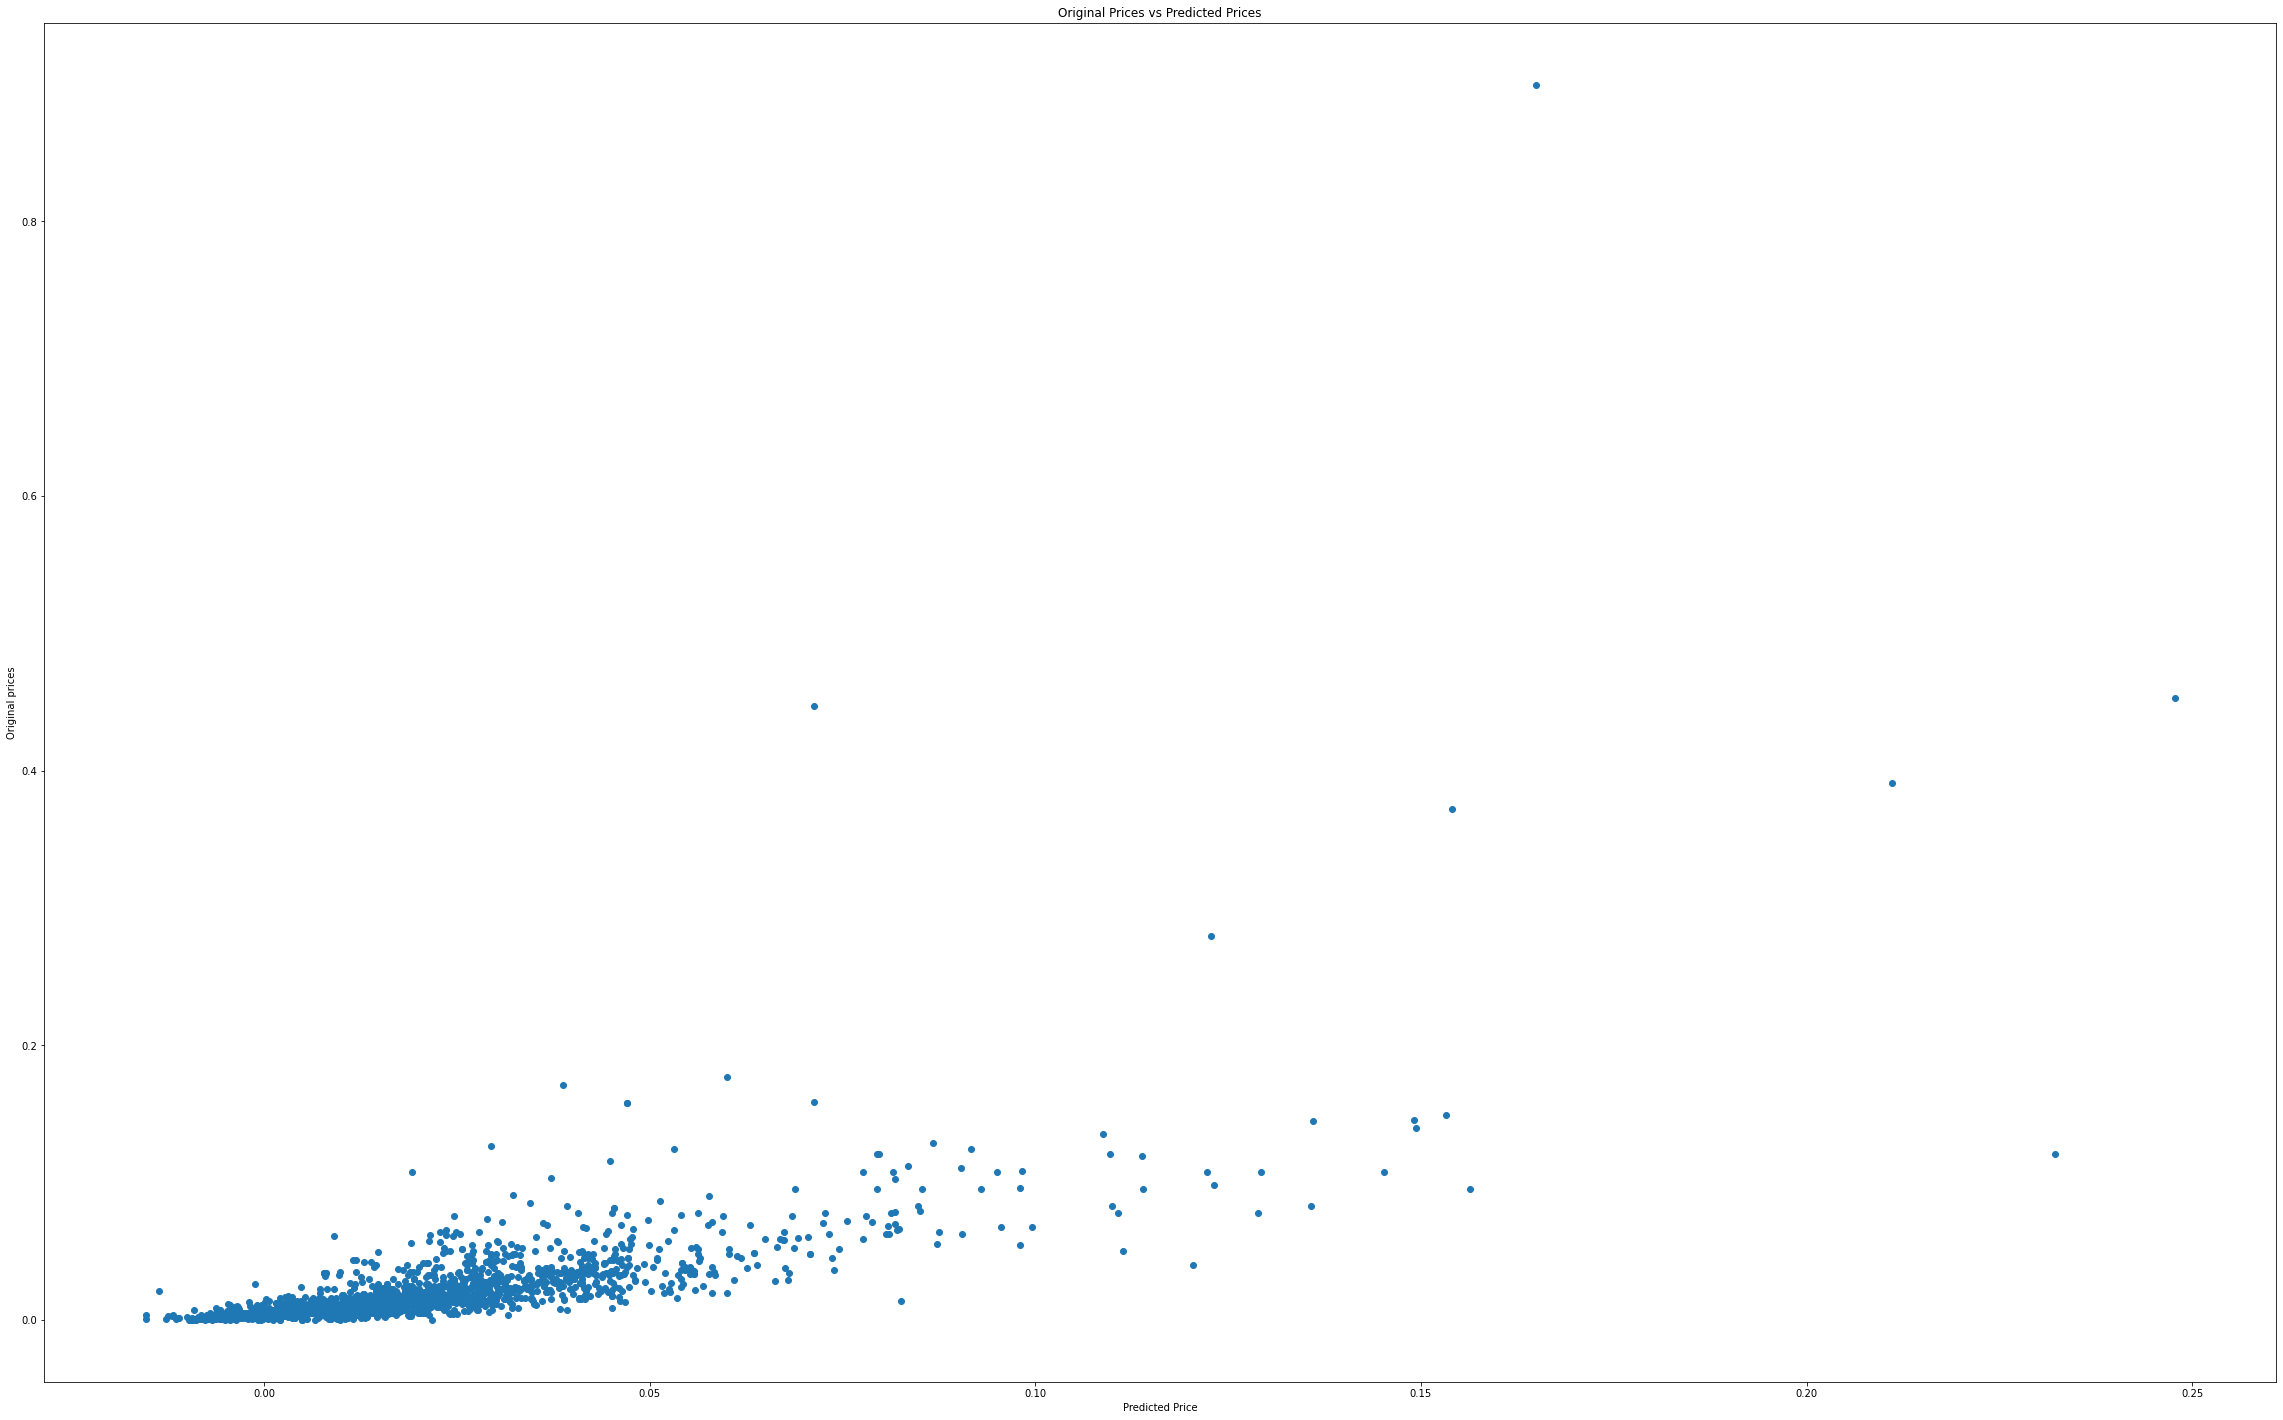

In [44]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_RR, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Original Prices vs Predicted Prices")
plt.show()

### 3.3 Lasso Regression

#### 3.3.1 Lasso Regression: Model Training

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
Lasso_R = Lasso()
Lasso_R.fit(X_train,y_train)

Lasso()

#### 3.3.2 Lasso Regression: Testing

In [47]:
y_predict_Lasso_R = Lasso_R.predict(X_test)
print(y_predict_Lasso_R)

[0.02100751 0.02100751 0.02100751 ... 0.02100751 0.02100751 0.02100751]


#### 3.3.3 Lasso Regression: Score / Results

In [48]:
Lasso_R_score = Lasso_R.score(X_test, y_test)
print(Lasso_R_score*100)

-6.056523220721033e-05


In [49]:
R2_Score_Lasso_R = r2_score(y_test, y_predict_Lasso_R)*100
MAE_Lasso_R = metrics.mean_absolute_error(y_test, y_predict_Lasso_R)*100
MSE_Lasso_R = metrics.mean_squared_error(y_test, y_predict_Lasso_R)*100
RSME_Lasso_R = np.sqrt(metrics.mean_squared_error(y_test, y_predict_Lasso_R))*100
print('R2 Score Linear Regression', R2_Score_Lasso_R)
print('MAE Ridge Regression:', MAE_Lasso_R)
print('MSE Ridge Regression:', MSE_Lasso_R)
print('RMSE Ridge Regression:', RSME_Lasso_R)

R2 Score Linear Regression -6.056523220721033e-05
MAE Ridge Regression: 1.6646506383074282
MSE Ridge Regression: 0.1208474081974611
RMSE Ridge Regression: 3.47631138129859


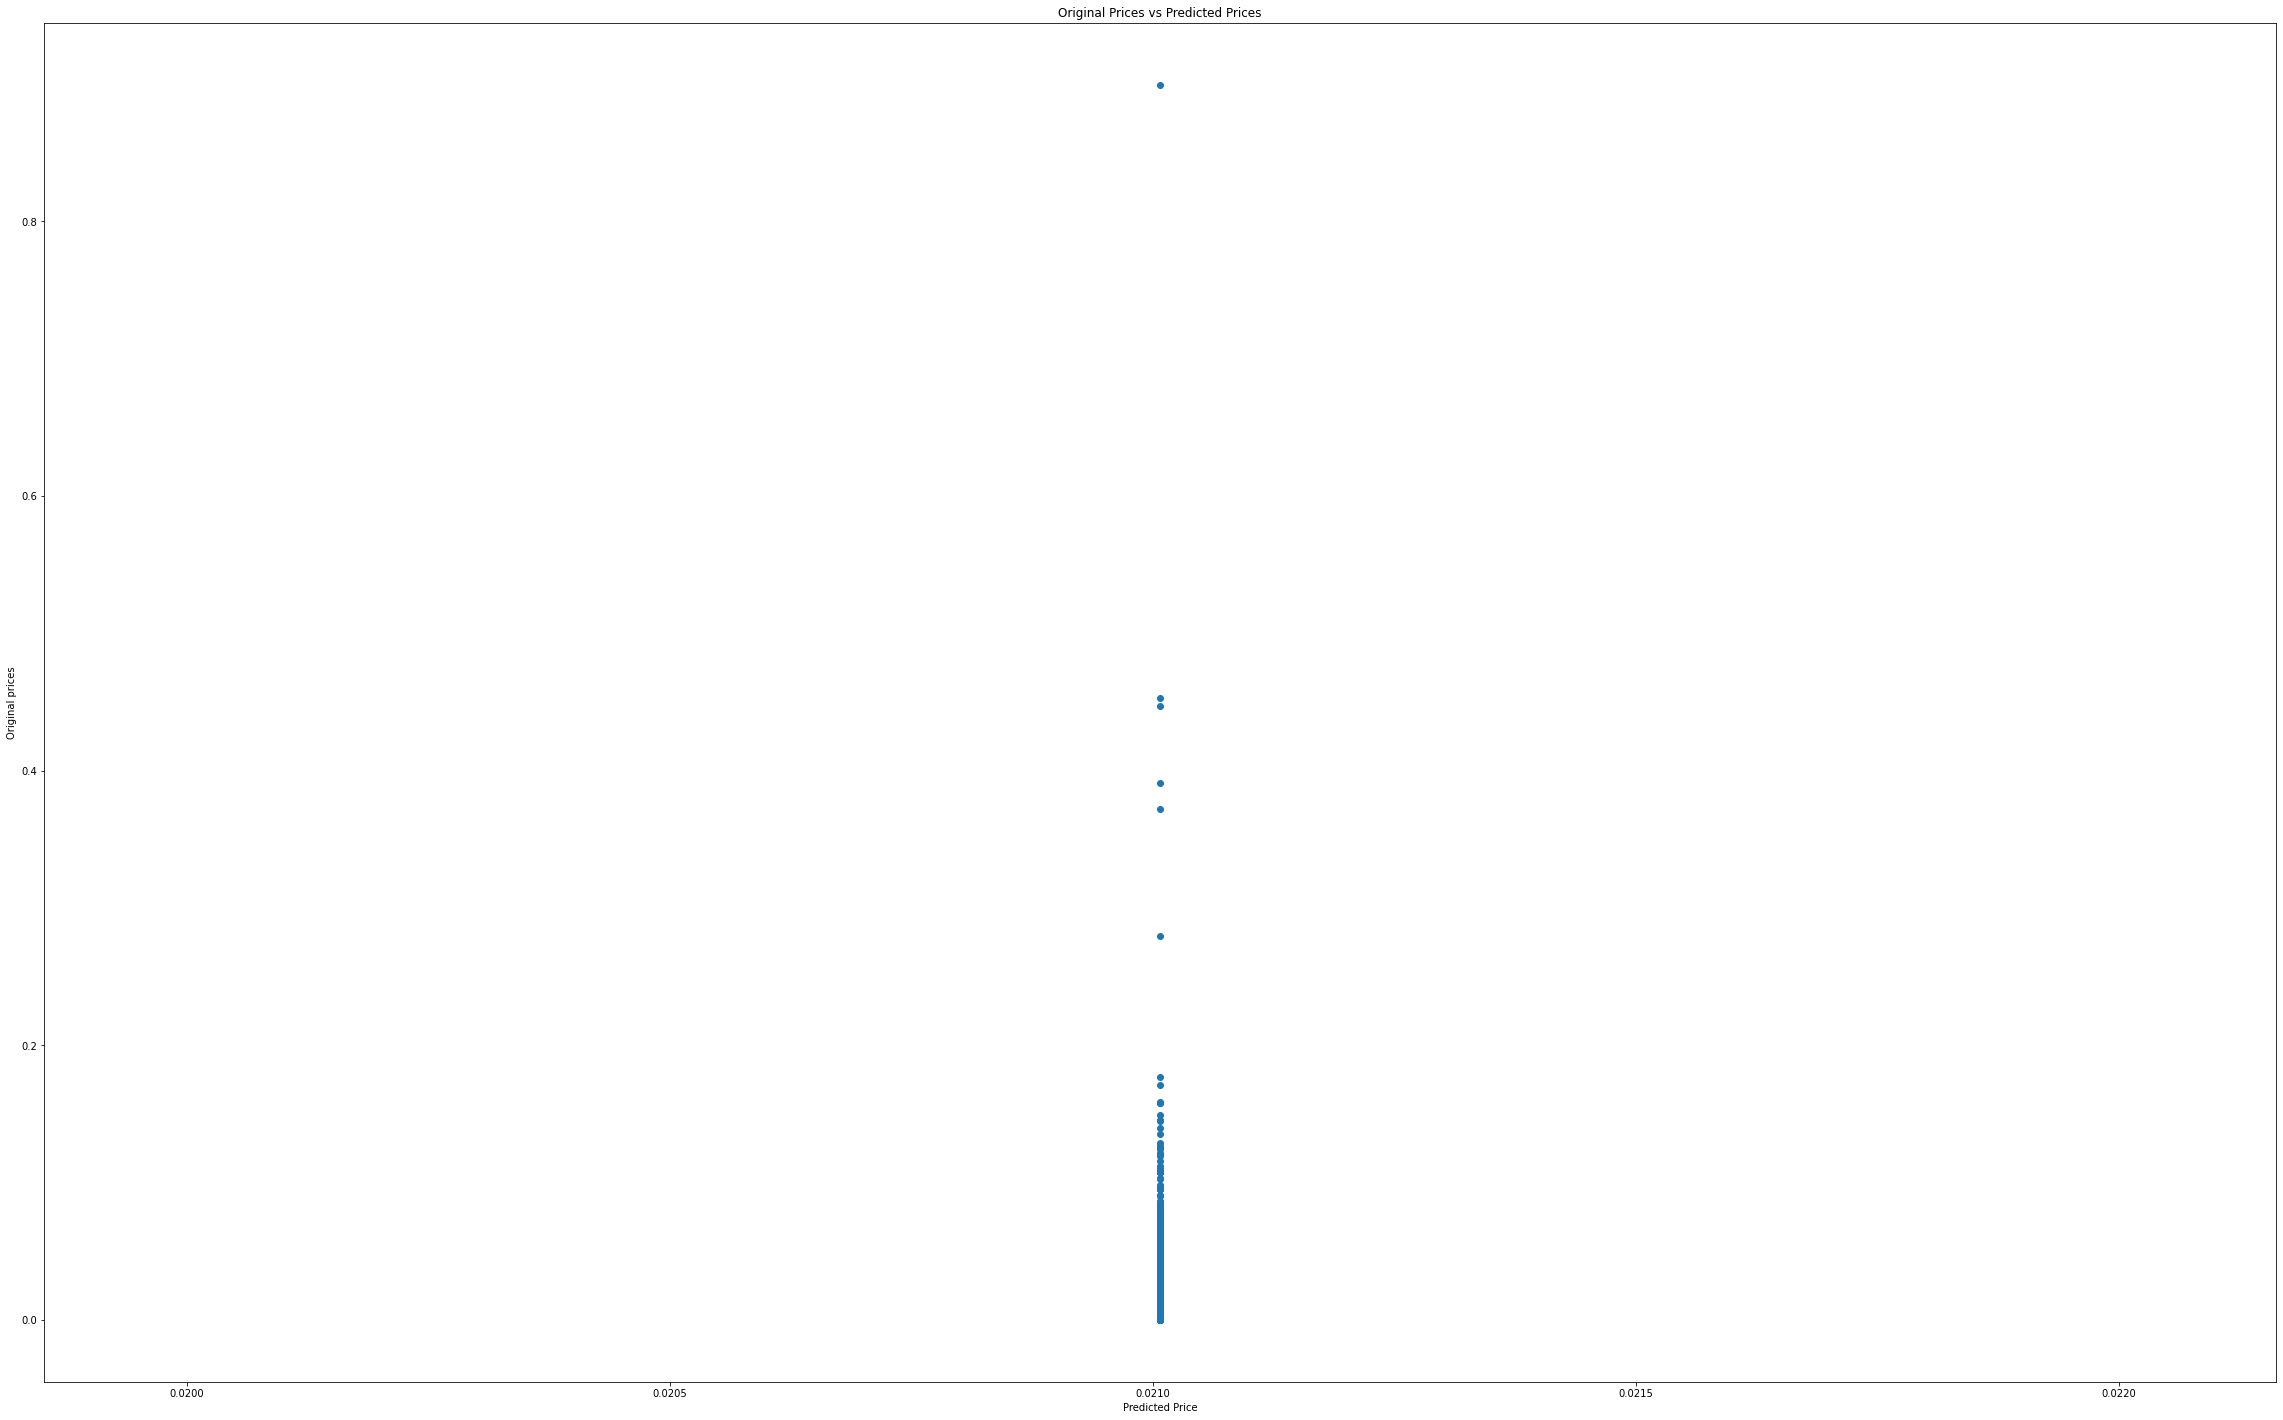

In [50]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_Lasso_R, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Original Prices vs Predicted Prices")
plt.show()

### 3.4 Decision Tree

#### 3.4.1 Decision Tree: Model Training

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
DT = DecisionTreeRegressor(max_depth=16)
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16)

#### 3.4.2 Decision Tree: Testing

In [134]:
y_predict_DT = DT.predict(X_test)
print(y_predict_DT)

[0.05       0.00725734 0.01151437 ... 0.01306533 0.00854774 0.00869598]


#### 3.4.3 Decision Tree: Score / Results

In [135]:
DT_score = DT.score(X_test, y_test)
print(DT_score*100)

51.49028592056815


In [136]:
R2_Score_DT = r2_score(y_test, y_predict_DT)*100
MAE_DT = metrics.mean_absolute_error(y_test, y_predict_DT)*100
MSE_DT = metrics.mean_squared_error(y_test, y_predict_DT)*100
RSME_DT = np.sqrt(metrics.mean_squared_error(y_test, y_predict_DT))*100
print('R2 Score Linear Regression', R2_Score_DT)
print('MAE Ridge Regression:', MAE_DT)
print('MSE Ridge Regression:', MSE_DT)
print('RMSE Ridge Regression:', RSME_DT)

R2 Score Linear Regression 51.49028592056815
MAE Ridge Regression: 0.587730186219174
MSE Ridge Regression: 0.058622696684019905
RMSE Ridge Regression: 2.4212124376852993


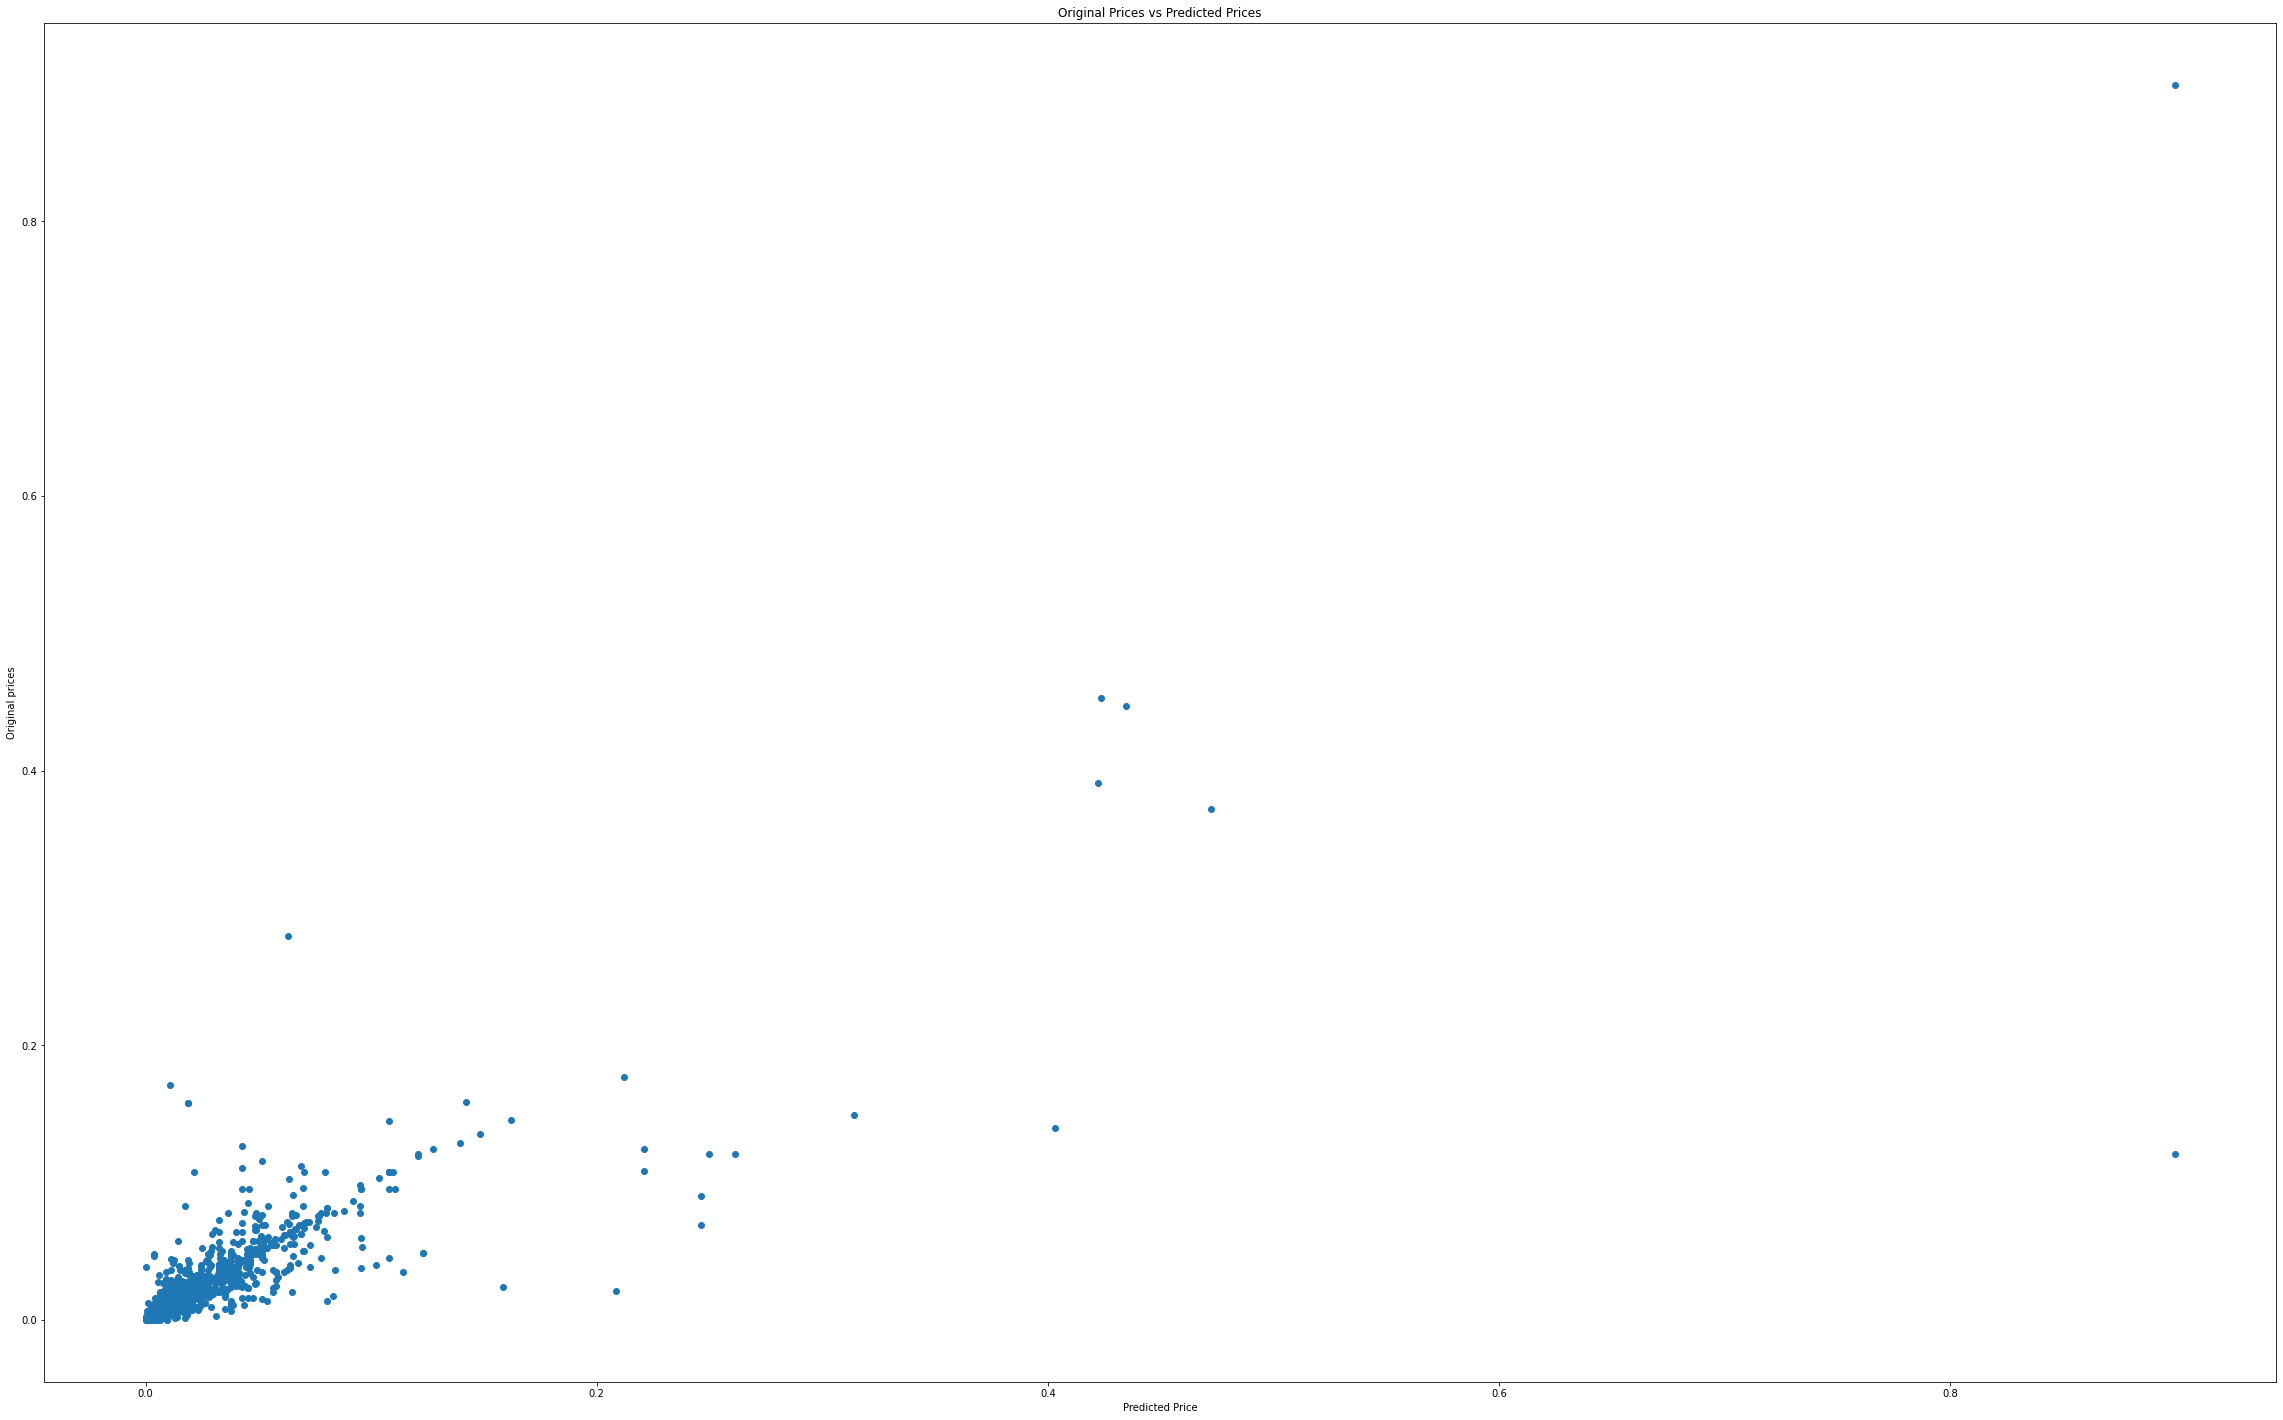

In [137]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_DT, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Original Prices vs Predicted Prices")
plt.show()

In [138]:
from sklearn import tree

In [ ]:
plt.figure(figsize= (40,25))
tree.plot_tree(DT, feature_names=data.columns, class_names=price, filled = True)

[Text(0.776212388453277, 0.9705882352941176, 'Area <= 0.221\nsquared_error = 0.001\nsamples = 8074\nvalue = 0.021'),
 Text(0.5686321705879014, 0.9117647058823529, 'Area <= 0.117\nsquared_error = 0.0\nsamples = 7570\nvalue = 0.017'),
 Text(0.3257849882341128, 0.8529411764705882, 'City <= 4.5\nsquared_error = 0.0\nsamples = 4803\nvalue = 0.01'),
 Text(0.20289074642439273, 0.7941176470588235, 'Area <= 0.077\nsquared_error = 0.0\nsamples = 3957\nvalue = 0.008'),
 Text(0.09668874316749035, 0.7352941176470589, 'Area <= 0.062\nsquared_error = 0.0\nsamples = 1547\nvalue = 0.005'),
 Text(0.060525557515324034, 0.6764705882352942, 'Gasconnection <= 0.5\nsquared_error = 0.0\nsamples = 888\nvalue = 0.003'),
 Text(0.04619475053699597, 0.6176470588235294, 'Area <= 0.049\nsquared_error = 0.0\nsamples = 826\nvalue = 0.003'),
 Text(0.030864170581352705, 0.5588235294117647, 'MaintenanceStaff <= 0.5\nsquared_error = 0.0\nsamples = 546\nvalue = 0.002'),
 Text(0.021964444754902817, 0.5, 'Area <= 0.04\nsquar

40